# Part 3: Handwriting recognition


In [1]:
from google.colab import drive
drive.mount('/content/drive')

root_dir = "/content/data"

Mounted at /content/drive


## Import Library and Data

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import os
import zipfile

import re
import cv2
import json

from heapq import heappush, heappop
from PIL import Image

## Load data

In [3]:
file_path = '/content/drive/My Drive/colab/paragraphe_test_1.json'
file_path_1 = '/content/drive/My Drive/colab/paragraphe_test_2.json'

with open(file_path, 'r') as file:
    paragraphe_test_loaded = json.load(file)

with open(file_path_1, 'r') as file:
    paragraphe_test_loaded_1 = json.load(file)

In [4]:
file_path = '/content/drive/My Drive/colab/paragraphe_real_1.json'
file_path_1 = '/content/drive/My Drive/colab/paragraphe_real_2.json'

with open(file_path, 'r') as file:
    paragraphe_real_loaded = json.load(file)

with open(file_path_1, 'r') as file:
    paragraphe_real_loaded_1 = json.load(file)

In [156]:
paragraphe_test_loaded[20]

['Meanwhile in Purley there was much activity and much',
 'co-operation especially with the other Christian communities.',
 'At a large public meeting we launched the project known as the',
 "' Couldon and Purley Patriotic Fund'in whose counsels and committees",
 'I found myself deeply involved At first, the main work was to help',
 "wives and relations of the soldiers to get their'Separation '",
 'allowances, but soon was ), as casualties began and increased',
 'in the winter of 1914 and 1915 the matter of War Pensions',
 'became very urgent, and I was asked to be Chairman.',
 'of the Committee in Coulsdon and Purley.']

In [157]:
paragraphe_real_loaded[20]

['" I feel I\'ve done all I can at the B.C. " he told me',
 "Escapologist Dill-Russell is a guest in Harbin's show tonight. Boxing fans can",
 'an eight-round feather-weight contest between Chris Elliot and Harry Carroll from',
 'Leicester ( B.C. 8.25 ). A SONGS-OF-',
 'in his " Make Mine Music " ( B.C. 9.30 p.m.']

### Processing

In [7]:
def join_paragraphe(array):

  paragraphe_array = []

  for line in array:
    generated_text_string = ' '.join(line)
    paragraphe_array.append(generated_text_string)

  return paragraphe_array

In [8]:
paragraphe_test = join_paragraphe(paragraphe_test_loaded)
paragraphe_test_1 = join_paragraphe(paragraphe_test_loaded_1)

paragraphe_real = join_paragraphe(paragraphe_real_loaded)
paragraphe_real_1 = join_paragraphe(paragraphe_real_loaded_1)

In [9]:
paragraphe_test[0]

'Wholesate chemical spraying, upsetting as it does the balance of nature by killing both pests and predators, is renewed with concern by a number of American State Research Stations. Not content with issuing bulletins on the dangers. of the misuse of chemicals in agriculture, some stations are carrying out useful research on pest control by biological means. Both native and imported predatory insects and insect pathogens. are used in field that tests.'

In [10]:
paragraphe_real[0]

'Wholesale chemical spraying as it does the balance of nature by killing both pests and predators, is viewed with concern by a number of American State Research Stations. Not content with issuing bulletins on the dangers of the misuse of chemicals in agriculture, some stations are carrying out useful research on pest control by biological means. Both native and imported predatory insects and insect pathogens'

## Compare

In [11]:
from difflib import SequenceMatcher

similarity_ratio_1 = SequenceMatcher(None, paragraphe_real[0], paragraphe_test[0]).ratio()
print(similarity_ratio_1)

0.21064814814814814


Natural Language Toolkit (NLTK): NLTK is a powerful library for natural language processing in Python. It offers different algorithms for similarity, including Jaccard similarity, cosine similarity, and others.

In [12]:
import nltk
nltk.download('punkt')

from nltk.metrics import jaccard_distance
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
# Tokenize sentences into words
words_real = word_tokenize(paragraphe_real[0])
words_test = word_tokenize(paragraphe_test[0])

# Calculate Jaccard similarity
jaccard_sim = 1 - jaccard_distance(set(words_real), set(words_test))
print(jaccard_sim)

0.8571428571428572


Spacy: Spacy is another popular library for NLP tasks and provides functionalities for word vectors which can be used for similarity comparison.

In [14]:
!python -m spacy download en_core_web_md

import spacy

2024-01-11 17:18:26.546219: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 17:18:26.546307: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 17:18:26.548491: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 17:18:26.562864: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-11 17:18:28.025588: W tensorflow/compiler/tf2

In [15]:
nlp = spacy.load("en_core_web_sm")
doc1 = nlp(paragraphe_real[0])
doc2 = nlp(paragraphe_test[0])

# Compute similarity between two documents
similarity_score = doc1.similarity(doc2)
print(similarity_score)

0.9699668795153594


<ipython-input-15-47f2fc89a155>:6: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity_score = doc1.similarity(doc2)


In [16]:
# Load the downloaded model
nlp = spacy.load("en_core_web_md")

doc1 = nlp(paragraphe_real[0])
doc2 = nlp(paragraphe_test[0])

# Compute similarity between two documents
similarity_score = doc1.similarity(doc2)
print(similarity_score)

0.9961926524213317


Gensim: Gensim is a robust library for topic modeling, document indexing, and similarity retrieval.

In [17]:
from gensim import corpora
from gensim.similarities import Similarity
from gensim.utils import tokenize

# Tokenize sentences and create dictionary
dictionary = corpora.Dictionary([list(tokenize(paragraphe_real[0])), list(tokenize(paragraphe_test[0]))])

# Create corpus
corpus = [dictionary.doc2bow(list(tokenize(sentence))) for sentence in [paragraphe_real[0], paragraphe_test[0]]]

# Calculate similarity using Similarity class
similarity = Similarity('', corpus, num_features=len(dictionary))
similarity_score = similarity[corpus[0]][1]
print(similarity_score)

0.9486832


## general

Display

In [18]:
import statistics

def calculate_similarity_statistics(similarity_ratio_array):
    result = {}

    # Calculating mean
    mean_similarity = statistics.mean(similarity_ratio_array)
    result['mean'] = mean_similarity

    # Calculating median
    median_similarity = statistics.median(similarity_ratio_array)
    result['median'] = median_similarity

    # Calculating mode
    try:
        mode_similarity = statistics.mode(similarity_ratio_array)
        result['mode'] = mode_similarity
    except statistics.StatisticsError:
        result['mode'] = 'No unique mode found'

    # Calculating standard deviation
    std_dev_similarity = statistics.stdev(similarity_ratio_array)
    result['standard_deviation'] = std_dev_similarity

    return result

In [19]:
def print_result(statistics_result):
  print("Mean similarity ratio:", statistics_result['mean'])
  print("Median similarity ratio:", statistics_result['median'])
  print("Mode similarity ratio:", statistics_result['mode'])
  print("Standard deviation of similarity ratios:", statistics_result['standard_deviation'])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def density_graph(array):
  # Création du graphe de densité
  sns.histplot(array, kde=True, stat='density')
  plt.xlabel('Valeurs')
  plt.ylabel('Densité')
  plt.title('Graphe de densité des valeurs du tableau')
  plt.show()

SequenceMatcher

In [21]:
def sequenceMatcher(paragraphe_real, paragraphe_test):
  similarity_ratio_array = []

  for i in range(len(paragraphe_real)):
    similarity_ratio = SequenceMatcher(None, paragraphe_real[i], paragraphe_test[i]).ratio()
    similarity_ratio_array.append(similarity_ratio)

  return similarity_ratio_array

Mean similarity ratio: 0.3220672904046665
Median similarity ratio: 0.06389776357827476
Mode similarity ratio: 0.21064814814814814
Standard deviation of similarity ratios: 0.3786800281819943


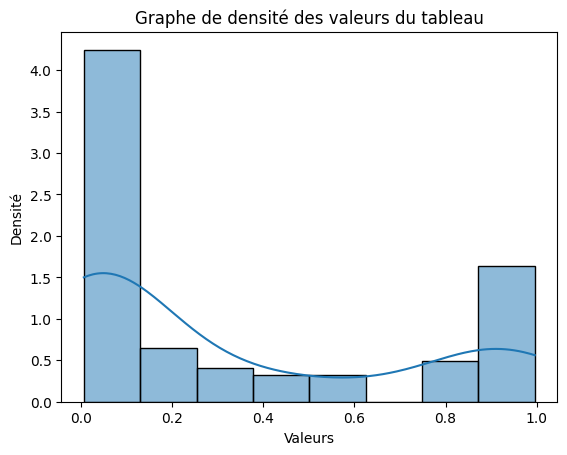

In [22]:
similarity_ratio_array = sequenceMatcher(paragraphe_real, paragraphe_test)
result_SequenceMatcher = calculate_similarity_statistics(similarity_ratio_array)

print_result(result_SequenceMatcher)
density_graph(similarity_ratio_array)

Mean similarity ratio: 0.2965828303548377
Median similarity ratio: 0.0547945205479452
Mode similarity ratio: 0.015772870662460567
Standard deviation of similarity ratios: 0.3609036254145555


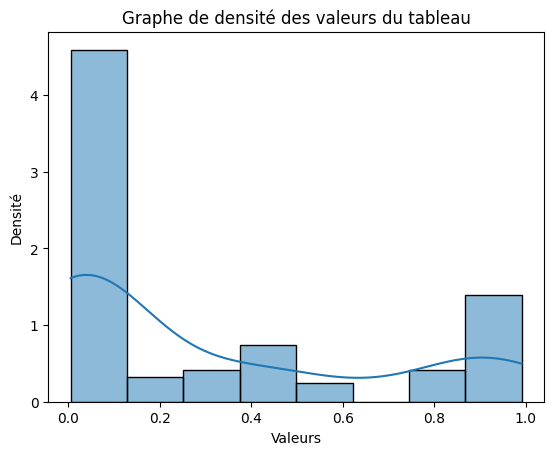

In [23]:
similarity_ratio_array_1 = sequenceMatcher(paragraphe_real_1, paragraphe_test_1)
result_SequenceMatcher_1 = calculate_similarity_statistics(similarity_ratio_array_1)

print_result(result_SequenceMatcher_1)
density_graph(similarity_ratio_array_1)

NLTK

In [28]:
def NLTK(paragraphe_real, paragraphe_test):
  NLTK_array = []

  for i in range(len(paragraphe_real)):

    # Tokenize sentences into words
    words_real = word_tokenize(paragraphe_real[i])
    words_test = word_tokenize(paragraphe_test[i])

    # Calculate Jaccard similarity
    jaccard_sim = 1 - jaccard_distance(set(words_real), set(words_test))

    NLTK_array.append(jaccard_sim)

  return NLTK_array

Mean similarity ratio: 0.4125821624814977
Median similarity ratio: 0.18823529411764706
Mode similarity ratio: 0.8571428571428572
Standard deviation of similarity ratios: 0.33848765574673895


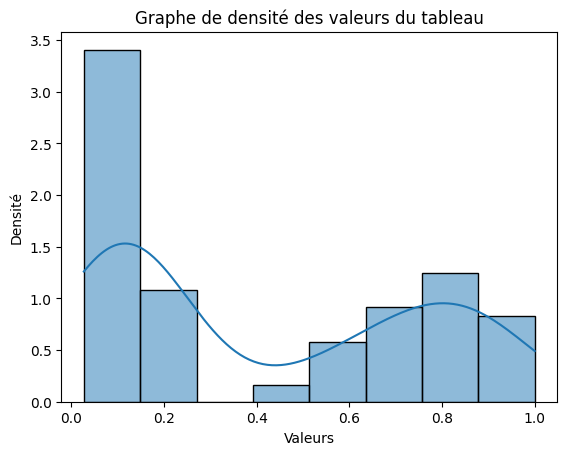

In [29]:
NLTK_array = NLTK(paragraphe_real, paragraphe_test)
result_NLTK = calculate_similarity_statistics(NLTK_array)

print_result(result_NLTK)
density_graph(NLTK_array)

Mean similarity ratio: 0.392346035504453
Median similarity ratio: 0.18571428571428572
Mode similarity ratio: 0.6857142857142857
Standard deviation of similarity ratios: 0.31828329224889923


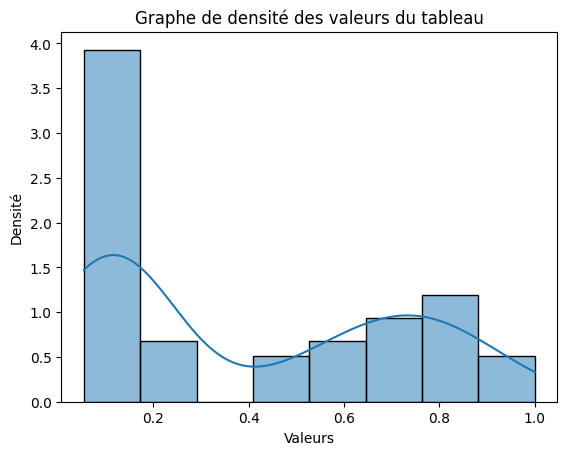

In [30]:
NLTK_array_1 = NLTK(paragraphe_real_1, paragraphe_test_1)
result_NLTK_1 = calculate_similarity_statistics(NLTK_array_1)

print_result(result_NLTK_1)
density_graph(NLTK_array_1)

Spacy

In [31]:
def spacy_sm(paragraphe_real, paragraphe_test):
  Spacy_sm_array = []
  nlp = spacy.load("en_core_web_sm")

  for i in range(len(paragraphe_real)):

    doc1 = nlp(paragraphe_real[i])
    doc2 = nlp(paragraphe_test[i])

    similarity_score = doc1.similarity(doc2)

    Spacy_sm_array.append(similarity_score)

  return Spacy_sm_array


def spacy_md(paragraphe_real, paragraphe_test):
  Spacy_md_array = []
  nlp = spacy.load("en_core_web_md")

  for i in range(len(paragraphe_real)):

    doc1 = nlp(paragraphe_real[i])
    doc2 = nlp(paragraphe_test[i])

    similarity_score = doc1.similarity(doc2)

    Spacy_md_array.append(similarity_score)

  return Spacy_md_array

<ipython-input-31-f4e5434db041>:10: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity_score = doc1.similarity(doc2)


Mean similarity ratio: 0.7853656226915594
Median similarity ratio: 0.7832539371196752
Mode similarity ratio: 0.9699668795153594
Standard deviation of similarity ratios: 0.1707120975485342


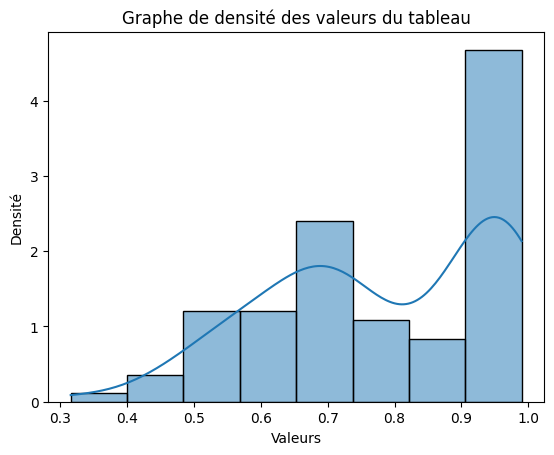

Mean similarity ratio: 0.9247809163381848
Median similarity ratio: 0.9405214224641605
Mode similarity ratio: 0.9961926524213317
Standard deviation of similarity ratios: 0.07618485370649834


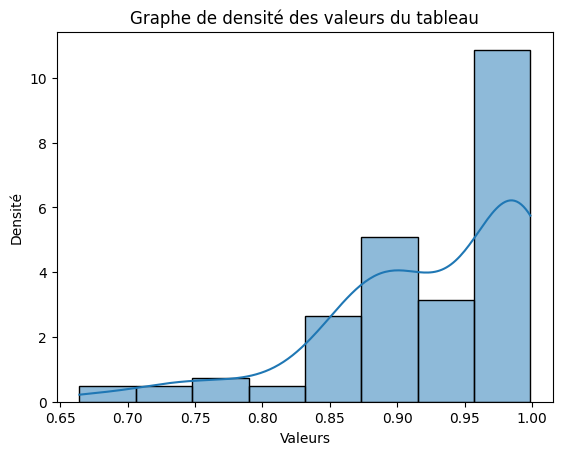

In [32]:
Spacy_sm_array = spacy_sm(paragraphe_real, paragraphe_test)
result_spacy_sm = calculate_similarity_statistics(Spacy_sm_array)

print_result(result_spacy_sm)
density_graph(Spacy_sm_array)


Spacy_md_array = spacy_md(paragraphe_real, paragraphe_test)
result_spacy_md = calculate_similarity_statistics(Spacy_md_array)

print_result(result_spacy_md)
density_graph(Spacy_md_array)

<ipython-input-31-f4e5434db041>:10: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity_score = doc1.similarity(doc2)


Mean similarity ratio: 0.782503225422498
Median similarity ratio: 0.77278896976759
Mode similarity ratio: 0.962029776808197
Standard deviation of similarity ratios: 0.16763726624050843


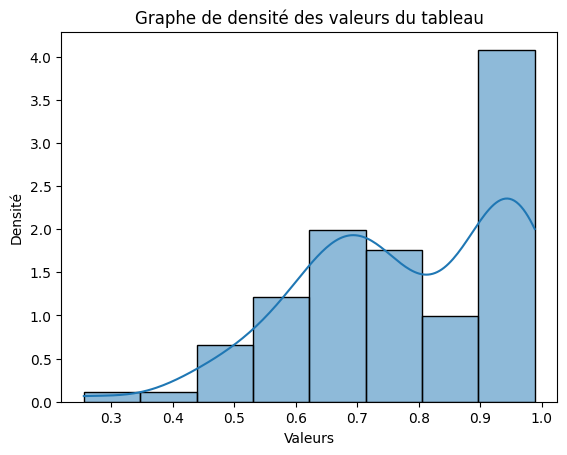

Mean similarity ratio: 0.9181405868561876
Median similarity ratio: 0.9305287544928874
Mode similarity ratio: 0.9952949087504138
Standard deviation of similarity ratios: 0.0837051690823289


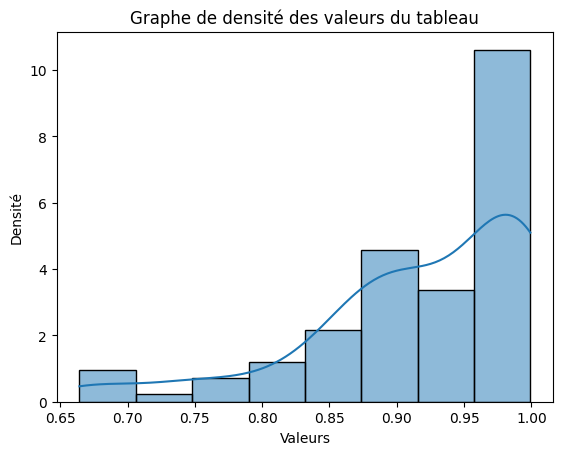

In [33]:
Spacy_sm_array_1 = spacy_sm(paragraphe_real_1, paragraphe_test_1)
result_spacy_sm_1 = calculate_similarity_statistics(Spacy_sm_array_1)

print_result(result_spacy_sm_1)
density_graph(Spacy_sm_array_1)


Spacy_md_array_1 = spacy_md(paragraphe_real, paragraphe_test_1)
result_spacy_md_1 = calculate_similarity_statistics(Spacy_md_array_1)

print_result(result_spacy_md_1)
density_graph(Spacy_md_array_1)

Gensim

In [34]:
def gensim(paragraphe_real, paragraphe_test):
  gensim_array = []

  for i in range(len(paragraphe_real)):

    dictionary = corpora.Dictionary([list(tokenize(paragraphe_real[i])), list(tokenize(paragraphe_test[i]))])

    # Create corpus
    corpus = [dictionary.doc2bow(list(tokenize(sentence))) for sentence in [paragraphe_real[i], paragraphe_test[i]]]

    # Calculate similarity using Similarity class
    similarity = Similarity('', corpus, num_features=len(dictionary))
    similarity_score = similarity[corpus[0]][1]

    gensim_array.append(similarity_score)

  return gensim_array

In [35]:
gensim_array = []

for i in range(len(paragraphe_real)):

  dictionary = corpora.Dictionary([list(tokenize(paragraphe_real[i])), list(tokenize(paragraphe_test[i]))])

  # Create corpus
  corpus = [dictionary.doc2bow(list(tokenize(sentence))) for sentence in [paragraphe_real[i], paragraphe_test[i]]]

  # Calculate similarity using Similarity class
  similarity = Similarity('', corpus, num_features=len(dictionary))
  similarity_score = similarity[corpus[0]][1]

  gensim_array.append(similarity_score)

Mean similarity ratio: 0.5949146
Median similarity ratio: 0.49478284
Mode similarity ratio: 0.9486832
Standard deviation of similarity ratios: 0.31045672469711516


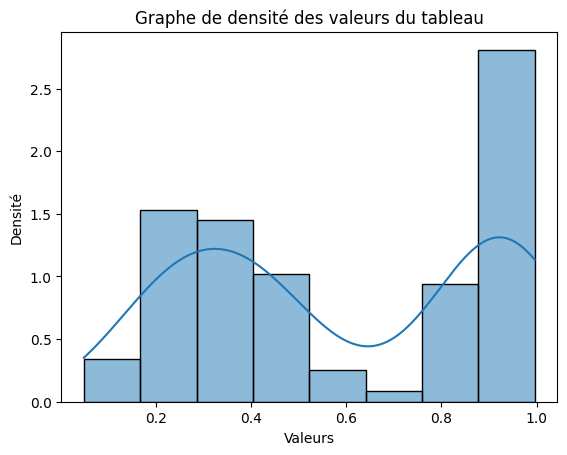

In [36]:
gensim_array = gensim(paragraphe_real, paragraphe_test)
result_gensim = calculate_similarity_statistics(gensim_array)

print_result(result_gensim)
density_graph(gensim_array)

Mean similarity ratio: 0.5900632
Median similarity ratio: 0.4738044
Mode similarity ratio: 0.93131363
Standard deviation of similarity ratios: 0.2994925648000402


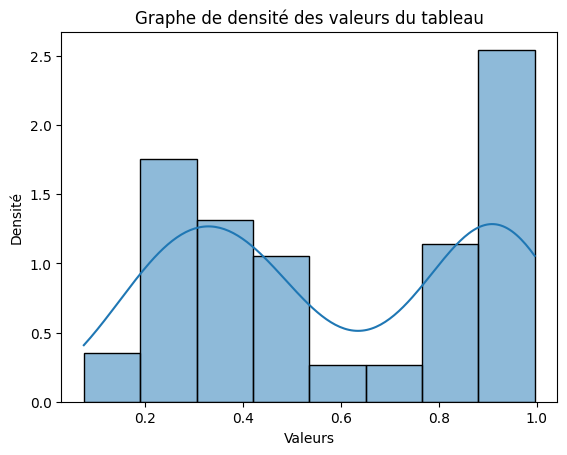

In [37]:
gensim_array_1 = gensim(paragraphe_real_1, paragraphe_test_1)
result_gensim_1 = calculate_similarity_statistics(gensim_array_1)

print_result(result_gensim_1)
density_graph(gensim_array_1)

### Comparation

In [39]:
df = pd.DataFrame([result_SequenceMatcher, result_NLTK, result_spacy_sm, result_spacy_md, result_gensim],
                  index=['SequenceMatcher', 'NLTK', 'Spacy_sm', 'Spacy_md', 'Gensim' ])

transposed_df = df.transpose()
print(transposed_df)

                    SequenceMatcher      NLTK  Spacy_sm  Spacy_md    Gensim
mean                       0.322067  0.412582  0.785366  0.924781  0.594915
median                     0.063898  0.188235  0.783254  0.940521  0.494783
mode                       0.210648  0.857143  0.969967  0.996193  0.948683
standard_deviation         0.378680  0.338488  0.170712  0.076185  0.310457


In [40]:
df = pd.DataFrame([result_SequenceMatcher_1, result_NLTK_1, result_spacy_sm_1, result_spacy_md_1, result_gensim_1],
                  index=['SequenceMatcher', 'NLTK', 'Spacy_sm', 'Spacy_md', 'Gensim' ])

transposed_df = df.transpose()
print(transposed_df)

                    SequenceMatcher      NLTK  Spacy_sm  Spacy_md    Gensim
mean                       0.296583  0.392346  0.782503  0.918141  0.590063
median                     0.054795  0.185714  0.772789  0.930529  0.473804
mode                       0.015773  0.685714  0.962030  0.995295  0.931314
standard_deviation         0.360904  0.318283  0.167637  0.083705  0.299493


### NLTK

In [69]:
max_similarity = max(NLTK_array)
print("Maximum similarity ratio:", max_similarity)

Maximum similarity ratio: 1.0


In [70]:
# Create a list of tuples containing index and similarity ratio
indexed_similarity = [(index, value) for index, value in enumerate(NLTK_array)]

# Sort the list of tuples based on similarity ratio in descending order
sorted_similarity = sorted(indexed_similarity, key=lambda x: x[1], reverse=True)

# Display the top 10 values and their positions
print("Top 10 similarity ratios and their positions:")
for rank, (index, value) in enumerate(sorted_similarity[:10], 1):
    print(f"Rank {rank}: Similarity Ratio {value} at position {index}")

Top 10 similarity ratios and their positions:
Rank 1: Similarity Ratio 1.0 at position 92
Rank 2: Similarity Ratio 0.9344262295081968 at position 78
Rank 3: Similarity Ratio 0.926829268292683 at position 97
Rank 4: Similarity Ratio 0.9206349206349207 at position 83
Rank 5: Similarity Ratio 0.9122807017543859 at position 80
Rank 6: Similarity Ratio 0.9090909090909091 at position 75
Rank 7: Similarity Ratio 0.8928571428571429 at position 90
Rank 8: Similarity Ratio 0.8870967741935484 at position 85
Rank 9: Similarity Ratio 0.8813559322033898 at position 93
Rank 10: Similarity Ratio 0.8805970149253731 at position 77


In [71]:
# Create a list of tuples containing index and similarity ratio
indexed_similarity = [(index, value) for index, value in enumerate(NLTK_array)]

# Sort the list of tuples based on similarity ratio in ascending order
sorted_similarity = sorted(indexed_similarity, key=lambda x: x[1])

# Display the worst 10 values and their positions
print("Worst 10 similarity ratios and their positions:")
for rank, (index, value) in enumerate(sorted_similarity[:10], 1):
    print(f"Rank {rank}: Similarity Ratio {value} at position {index}")

Worst 10 similarity ratios and their positions:
Rank 1: Similarity Ratio 0.0273972602739726 at position 58
Rank 2: Similarity Ratio 0.06140350877192979 at position 20
Rank 3: Similarity Ratio 0.0625 at position 26
Rank 4: Similarity Ratio 0.0625 at position 54
Rank 5: Similarity Ratio 0.06603773584905659 at position 27
Rank 6: Similarity Ratio 0.07070707070707072 at position 21
Rank 7: Similarity Ratio 0.07079646017699115 at position 55
Rank 8: Similarity Ratio 0.07291666666666663 at position 28
Rank 9: Similarity Ratio 0.07317073170731703 at position 31
Rank 10: Similarity Ratio 0.07627118644067798 at position 35


In [72]:
# Calculate the mean similarity ratio
mean_similarity = statistics.mean(NLTK_array)

# Define a range around the mean (e.g., +/- 0.05 as an example)
range_around_mean = 0.05

# Define the lower and upper bounds of the range
lower_bound = mean_similarity - range_around_mean
upper_bound = mean_similarity + range_around_mean

# Filter values within the defined range
values_around_mean = [(index, value) for index, value in enumerate(similarity_ratio_array)
                      if lower_bound <= value <= upper_bound]

# Display values around the mean and their positions
print(f"Values around the mean similarity ratio ({mean_similarity}):")
for index, value in values_around_mean:
    print(f"Similarity Ratio {value} at position {index}")

Values around the mean similarity ratio (0.4125821624814977):
Similarity Ratio 0.37538461538461537 at position 3
Similarity Ratio 0.3924843423799583 at position 63
Similarity Ratio 0.4038095238095238 at position 65
Similarity Ratio 0.39156626506024095 at position 66


## Display

### Paragraphe

In [41]:
paragraphe_img_zip = '/content/drive/MyDrive/colab/paragraph_images_1.zip'
with zipfile.ZipFile(paragraphe_img_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/paragraphe_img/')

In [42]:
paragraphe_list = []
folder_path = "paragraphe_img/"

def extract_index_and_i(filename):
    pattern = r'image_(\d+)_bb_(\d+)\.png'  # Define the regex pattern
    match = re.match(pattern, filename)

    if match:
        index = match.group(1)
        i = match.group(2)
        return int(index), int(i)

    return None, None  # Return None if no match is found

# Check if the folder exists
if os.path.exists(folder_path):
    for root, directories, files in os.walk(folder_path):
        for file in files:
          index, i = extract_index_and_i(file)
          file_path = os.path.join(root, file)

          while len(paragraphe_list) <= index:
                    paragraphe_list.append([])

          while len(paragraphe_list[index]) < i:
                    paragraphe_list[index].append(None)

          paragraphe_list[index][i - 1] = file_path


else:
    print(f"The folder '{folder_path}' does not exist.")

In [43]:
# Display the paragraph_list
for index, paragraph in enumerate(paragraphe_list[:10]):
    print(f"Index {index}: {paragraph}")

Index 0: ['paragraphe_img/image_0_bb_1.png', 'paragraphe_img/image_0_bb_2.png']
Index 1: ['paragraphe_img/image_1_bb_1.png', 'paragraphe_img/image_1_bb_2.png']
Index 2: ['paragraphe_img/image_2_bb_1.png', 'paragraphe_img/image_2_bb_2.png']
Index 3: ['paragraphe_img/image_3_bb_1.png', 'paragraphe_img/image_3_bb_2.png']
Index 4: ['paragraphe_img/image_4_bb_1.png', 'paragraphe_img/image_4_bb_2.png']
Index 5: ['paragraphe_img/image_5_bb_1.png', 'paragraphe_img/image_5_bb_2.png']
Index 6: ['paragraphe_img/image_6_bb_1.png', 'paragraphe_img/image_6_bb_2.png']
Index 7: ['paragraphe_img/image_7_bb_1.png', 'paragraphe_img/image_7_bb_2.png']
Index 8: ['paragraphe_img/image_8_bb_1.png', 'paragraphe_img/image_8_bb_2.png']
Index 9: ['paragraphe_img/image_9_bb_1.png', 'paragraphe_img/image_9_bb_2.png']


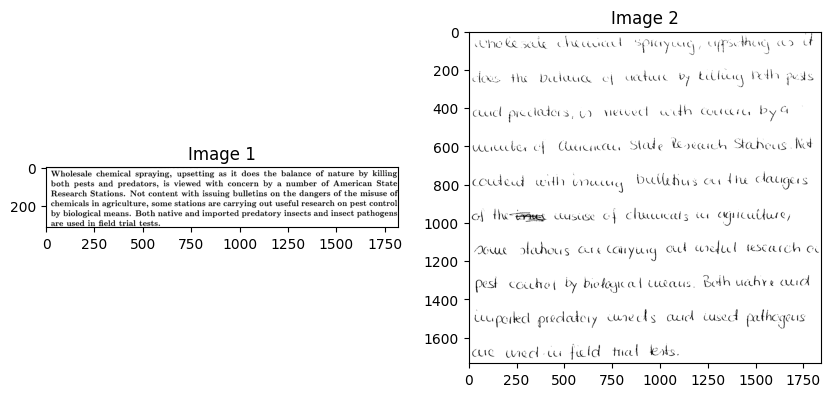

In [74]:
# Load the grayscale image
image1 = cv2.imread(paragraphe_list[0][0], cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(paragraphe_list[0][1], cv2.IMREAD_GRAYSCALE)

# Display the original and binary images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Image 2')

plt.show()

Text(0.5, 1.0, 'Paragraphe')

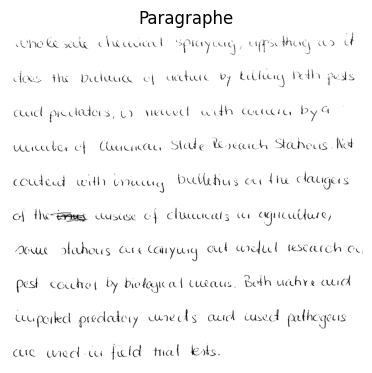

In [76]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.axis('off')  # Remove the axes

plt.title('Paragraphe')

In [45]:
len(paragraphe_list)

100

### Line

In [46]:
paragraphe_img_line_test_zip = '/content/drive/MyDrive/colab/lines_images_1.zip'
with zipfile.ZipFile(paragraphe_img_line_test_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/line_img_test/')

In [47]:
paragraphe_img_line_real_zip = '/content/drive/MyDrive/colab/lines_images_b_1.zip'
with zipfile.ZipFile(paragraphe_img_line_real_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/line_img_real/')

In [48]:
folder_path = "line_img_test/"
folder_path_b = "line_img_real/"
lines_list = []
lines_list_b = []

# Check if the folder exists
if os.path.exists(folder_path):
    folders = sorted(next(os.walk(folder_path))[1])  # Get sorted list of subdirectories

    for folder in folders:
        folder_files = []
        folder_dir = os.path.join(folder_path, folder)

        # Collect files in the folder and sort them
        folder_files = sorted([os.path.join(folder_dir, file) for file in os.listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file))])

        lines_list.append(folder_files)

else:
    print(f"The folder '{folder_path}' does not exist.")


# Check if the folder exists
if os.path.exists(folder_path_b):
    folders = sorted(next(os.walk(folder_path_b))[1])  # Get sorted list of subdirectories

    for folder in folders:
        folder_files_b = []
        folder_dir = os.path.join(folder_path_b, folder)

        # Collect files in the folder and sort them
        folder_files_b = sorted([os.path.join(folder_dir, file) for file in os.listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file))])

        lines_list_b.append(folder_files_b)

else:
    print(f"The folder '{folder_path_b}' does not exist.")

In [49]:
print(len(lines_list))
print(len(lines_list_b))

99
99


In [50]:
def extract_number(filename):
    return int(filename.split('_')[-1].split('.')[0])

In [51]:
sorted_region_lines_real = []

for line in lines_list_b:
  sorted_files = sorted(line, key=extract_number)
  sorted_region_lines_real.append(sorted_files)

In [52]:
sorted_region_lines_test = []

for line in lines_list:
  sorted_files = sorted(line, key=extract_number)
  sorted_region_lines_test.append(sorted_files)

In [53]:
sorted_region_lines_test[0]

['line_img_test/segmented_images_0/extracted_region_1.png',
 'line_img_test/segmented_images_0/extracted_region_2.png',
 'line_img_test/segmented_images_0/extracted_region_3.png',
 'line_img_test/segmented_images_0/extracted_region_4.png',
 'line_img_test/segmented_images_0/extracted_region_5.png',
 'line_img_test/segmented_images_0/extracted_region_6.png',
 'line_img_test/segmented_images_0/extracted_region_7.png',
 'line_img_test/segmented_images_0/extracted_region_8.png',
 'line_img_test/segmented_images_0/extracted_region_9.png',
 'line_img_test/segmented_images_0/extracted_region_10.png']

Sort segmented image

In [54]:
def extract_values_from_array(input_list):
    extracted_values = [int(sub_array[0].split('/')[1].split('_')[2]) for sub_array in input_list]
    return extracted_values

In [55]:
extract_value_test = extract_values_from_array(sorted_region_lines_test)
extract_value_real = extract_values_from_array(sorted_region_lines_real)

In [56]:
print(extract_value_test[:5])
print(extract_value_real[:5])

[0, 1, 10, 11, 12]
[0, 1, 10, 11, 12]


In [57]:
paired_list_test = list(zip(sorted_region_lines_test, extract_value_test))

sorted_pairs_test = sorted(paired_list_test, key=lambda x: x[1])
sorted_array_list_test = [pair[0] for pair in sorted_pairs_test]

sorted_array_list_test[:3]

[['line_img_test/segmented_images_0/extracted_region_1.png',
  'line_img_test/segmented_images_0/extracted_region_2.png',
  'line_img_test/segmented_images_0/extracted_region_3.png',
  'line_img_test/segmented_images_0/extracted_region_4.png',
  'line_img_test/segmented_images_0/extracted_region_5.png',
  'line_img_test/segmented_images_0/extracted_region_6.png',
  'line_img_test/segmented_images_0/extracted_region_7.png',
  'line_img_test/segmented_images_0/extracted_region_8.png',
  'line_img_test/segmented_images_0/extracted_region_9.png',
  'line_img_test/segmented_images_0/extracted_region_10.png'],
 ['line_img_test/segmented_images_1/extracted_region_1.png',
  'line_img_test/segmented_images_1/extracted_region_2.png',
  'line_img_test/segmented_images_1/extracted_region_3.png',
  'line_img_test/segmented_images_1/extracted_region_4.png',
  'line_img_test/segmented_images_1/extracted_region_5.png',
  'line_img_test/segmented_images_1/extracted_region_6.png',
  'line_img_test/segme

In [58]:
paired_list_real = list(zip(sorted_region_lines_real, extract_value_real))

sorted_pairs_real = sorted(paired_list_real, key=lambda x: x[1])
sorted_array_list_real = [pair[0] for pair in sorted_pairs_real]

sorted_array_list_real[:3]

[['line_img_real/segmented_images_0/extracted_region_1.png',
  'line_img_real/segmented_images_0/extracted_region_2.png',
  'line_img_real/segmented_images_0/extracted_region_3.png',
  'line_img_real/segmented_images_0/extracted_region_4.png',
  'line_img_real/segmented_images_0/extracted_region_5.png'],
 ['line_img_real/segmented_images_1/extracted_region_1.png',
  'line_img_real/segmented_images_1/extracted_region_2.png',
  'line_img_real/segmented_images_1/extracted_region_3.png',
  'line_img_real/segmented_images_1/extracted_region_4.png',
  'line_img_real/segmented_images_1/extracted_region_5.png'],
 ['line_img_real/segmented_images_2/extracted_region_1.png',
  'line_img_real/segmented_images_2/extracted_region_2.png',
  'line_img_real/segmented_images_2/extracted_region_3.png',
  'line_img_real/segmented_images_2/extracted_region_4.png',
  'line_img_real/segmented_images_2/extracted_region_5.png']]

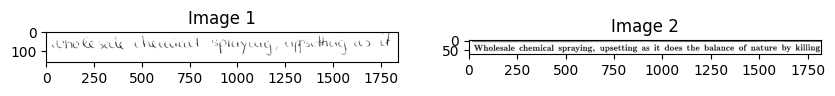

In [59]:
# Load the grayscale image
image1 = cv2.imread(sorted_array_list_test[0][0], cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(sorted_array_list_real[0][0], cv2.IMREAD_GRAYSCALE)

# Display the original and binary images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Image 2')

plt.show()

In [60]:
print(len(sorted_array_list_test))
print(len(sorted_array_list_real))

99
99


### Writting recognition

In [61]:
print(len(paragraphe_test_loaded))
print(len(paragraphe_real_loaded))

99
99


### Choose element

In [214]:
choose_element = 32

image_line_test = []
image_line_test_name = []

image_line_real = []
image_line_real_name = []


hand_writting = paragraphe_test_loaded[choose_element]
computer_writting = paragraphe_real_loaded[choose_element]

paragraph_real = paragraphe_list[choose_element][0]
paragraph_test = paragraphe_list[choose_element][1]

image_paragraphe = cv2.imread(paragraph_test, cv2.IMREAD_GRAYSCALE)

for line in sorted_array_list_test[choose_element] :
  image_line_test_name.append(line)
  image_line_test.append(cv2.imread(line, cv2.IMREAD_GRAYSCALE))

for line in sorted_array_list_real[choose_element] :
  image_line_real_name.append(line)
  image_line_real.append(cv2.imread(line, cv2.IMREAD_GRAYSCALE))

In [191]:
image_paragraphe_reel = cv2.imread(paragraph_real, cv2.IMREAD_GRAYSCALE)


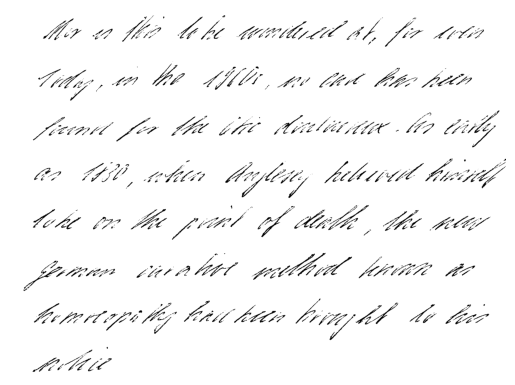

In [215]:
# Display the original and binary images using matplotlib

plt.imshow(image_paragraphe, cmap='gray')
#plt.title('Image 1')
plt.axis('off')


plt.show()

In [189]:
NLTK_array[27]

0.06603773584905659